# Querying and joining all of the data

Here we want to check what is the adequate timeframe to wait for a patent to be granted. (After the search report has been published).

This will be checked on a general and per industry basis to determine what is a "good" interval for  a patent to be granted. (Because we do not have acess to the decission data).

In [2]:
from epo.tipdata.epab import EPABClient
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
epab = EPABClient('PROD')

In [4]:
epab.fields()

WidDatabaseFields(header='', input_data={'': [{'name': 'epab_doc_id', 'type': 'STRING', 'mode': 'REQUIRED', 'd…

We need to combine the A1 publications with the A2 and A3 

In [11]:
# I am using the following code to query the EPO full text database: #Here we select all of the A1 publications

# Defining the fields to select
selection = (
    "a.publication,"
    "a.application,"
    "a.ipc,"
    "a.cpc,"
    "a.search_report.ipc_field,"
    "a.srep_citation,"
    "a.reference,"
    "MIN(b.publication.date) AS patent_granted_date,"    
    "CASE WHEN MIN(b.publication.date) IS NOT NULL THEN TRUE ELSE FALSE END AS patent_granted"
)

condition = (
    " WHERE a.publication.kind LIKE 'A1'"
    " AND a.search_report IS NOT NULL"
)

# Putting the statement together
statement = (
    f"SELECT {selection} "
    f"FROM `{epab.full_table_name}` AS a "
    f"LEFT JOIN `{epab.full_table_name}` AS b "
    f"ON a.application.number = b.application.number "
    f"AND b.publication.kind LIKE 'B1' "
    f"{condition} "
    # Group by your dimension fields (not by the new aggregates)
    f"GROUP BY "
    f" a.publication,"
    f"a.cpc,"
    f"a.ipc,"
    f"a.search_report.ipc_field,"
    f"a.srep_citation,"
    f"a.reference,"
    f"a.applicant,"
    f"a.inventor,"
    f"a.application;"
)

print(statement)

# Querying EPAB with the SQL statement
A1_publications = epab.sql_query(statement)

SELECT a.publication,a.application,a.ipc,a.cpc,a.search_report.ipc_field,a.srep_citation,a.reference,a.applicant,a.inventor,MIN(b.publication.date) AS patent_granted_date,CASE WHEN MIN(b.publication.date) IS NOT NULL THEN TRUE ELSE FALSE END AS patent_granted FROM `p-epo-tip-prj-3a1f.p_epo_tip_euwe4_bqd_epab.publications` AS a LEFT JOIN `p-epo-tip-prj-3a1f.p_epo_tip_euwe4_bqd_epab.publications` AS b ON a.application.number = b.application.number AND b.publication.kind LIKE 'B1'  WHERE a.publication.kind LIKE 'A1' AND a.search_report IS NOT NULL GROUP BY  a.publication,a.cpc,a.ipc,a.search_report.ipc_field,a.srep_citation,a.reference,a.applicant,a.inventor,a.application;


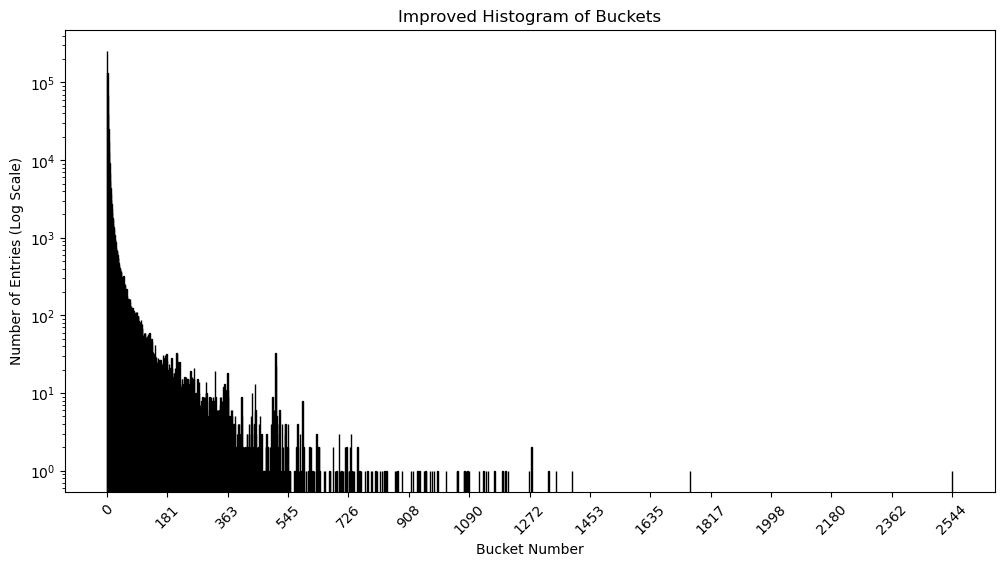

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Your dictionary (bucket_number -> number_of_entries)
buckets = ref_count_dict  # Replace with your actual dictionary

# Extracting and sorting bucket data
bucket_numbers, entry_counts = zip(*sorted(buckets.items()))

# Plotting
plt.figure(figsize=(12, 6))  # Increase figure size for clarity
plt.bar(bucket_numbers, entry_counts, width=1.0, edgecolor="black")

# Log scale for better visibility of large variations
plt.yscale("log")

# Reduce x-axis ticks to avoid clutter
num_xticks = 15  # Adjust based on the dataset
selected_ticks = np.linspace(min(bucket_numbers), max(bucket_numbers), num_xticks, dtype=int)
plt.xticks(selected_ticks, rotation=45)

# Labels and title
plt.xlabel("Bucket Number")
plt.ylabel("Number of Entries (Log Scale)")
plt.title("Improved Histogram of Buckets")

plt.show()


In [132]:
#pubs_with_available_search_reports_df.to_csv('./Data/publications_with_available_search_reports_classification_dates_only.csv',sep='\t',index=False)

# Time to Grant distribution (all data is with search reports)

## No industry classification

In [2]:
import pandas as pd
# DATA LOADING CELL

pubs_with_available_search_reports_df = pd.read_csv('./Data/publications_with_available_search_reports_classification_dates_only.csv',sep='\t')

In [3]:
pubs_with_available_search_reports_df

,ipc,cpc,patent_granted_date,patent_granted,publication.date,application.number,application.filing_date
0,"[{'version': '8', 'symbol': 'G06Q30/02', 'cate...",[],NaN,False,20160629,14461603.4,20141222
1,"[{'version': '8', 'symbol': 'G16H50/20', 'cate...",[],NaN,False,20190821,19155430.2,20190205
2,"[{'version': '8', 'symbol': 'H01L21/66', 'cate...",[],NaN,False,20210728,21163158.5,20180209
3,"[{'version': '8', 'symbol': 'H04W72/40', 'cate...","[{'symbol': 'H04W72/40', 'category': 'Inv', 'e...",NaN,False,20230927,23160700.3,20230308
4,"[{'version': '8', 'symbol': 'G06T7/80', 'categ...","[{'symbol': 'G06T2207/30232', 'category': 'Add...",NaN,False,20220420,21210977.1,20190521
...,...,...,...,...,...,...,...
756978,"[{'version': '8', 'symbol': 'F01D5/18', 'categ...",[],20190213.0,True,20180314,12167118.4,20120508
756979,"[{'version': '8', 'symbol': 'E02D5/80', 'categ...","[{'symbol': 'E04H12/223', 'category': 'Inv', '...",20231101.0,True,20220105,21161957.2,20210311
756980,"[{'version': '8', 'symbol': 'F01D17/14', 'cate...",[],20190306.0,True,20171220,12160976.2,20120323
756981,"[{'version': '8', 'symbol': 'G05D16/10', 'cate...",[],20191127.0,True,20160601,15191477.7,20151026


In [4]:
pubs_with_available_search_reports_df =pubs_with_available_search_reports_df[pubs_with_available_search_reports_df['patent_granted']==True] 

In [5]:


pubs_with_available_search_reports_df['patent_granted_date'] = pd.to_datetime(pubs_with_available_search_reports_df['patent_granted_date'], format='%Y%m%d')
pubs_with_available_search_reports_df['publication.date'] = pd.to_datetime(pubs_with_available_search_reports_df['publication.date'], format='%Y%m%d')

# 2. Create a timedelta by subtracting dates
time_diff = pubs_with_available_search_reports_df['patent_granted_date'] - pubs_with_available_search_reports_df['publication.date']

# 3. Calculate difference in days
pubs_with_available_search_reports_df['days_to_grant'] = time_diff.dt.days  # integer

# 4. Calculate difference in months (float)
#    Option A: Approximate months by dividing days by ~30.44
pubs_with_available_search_reports_df['months_to_grant'] = pubs_with_available_search_reports_df['days_to_grant'] / 30.44
pubs_with_available_search_reports_df['years_to_grant'] = pubs_with_available_search_reports_df['months_to_grant'] / 12

pubs_with_available_search_reports_df.reset_index(drop=True, inplace=True)


/tmp/ipykernel_5355/1028101713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_with_available_search_reports_df['patent_granted_date'] = pd.to_datetime(pubs_with_available_search_reports_df['patent_granted_date'], format='%Y%m%d')
/tmp/ipykernel_5355/1028101713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pubs_with_available_search_reports_df['publication.date'] = pd.to_datetime(pubs_with_available_search_reports_df['publication.date'], format='%Y%m%d')
/tmp/ipykernel_5355/1028101713.py:8: S

In [6]:
pubs_with_available_search_reports_df

,ipc,cpc,patent_granted_date,patent_granted,publication.date,application.number,application.filing_date,days_to_grant,months_to_grant,years_to_grant
0,"[{'version': '8', 'symbol': 'F01D5/18', 'categ...",[],2024-04-17,True,2017-06-07,16201463.3,20161130,2506,82.325887,6.860491
1,"[{'version': '8', 'symbol': 'F16L11/00', 'cate...",[],2014-12-10,True,2013-01-30,12005422.6,20120725,679,22.306176,1.858848
2,"[{'version': '8', 'symbol': 'F28F3/12', 'categ...",[],2015-08-26,True,2014-04-16,12007006.5,20121009,497,16.327201,1.360600
3,"[{'version': '8', 'symbol': 'F01D25/30', 'cate...",[],2015-04-29,True,2013-10-02,13161279.8,20130327,574,18.856767,1.571397
4,"[{'version': '8', 'symbol': 'F16B19/02', 'cate...","[{'symbol': 'B25B11/00', 'category': 'Inv', 'e...",2024-05-15,True,2023-07-26,22210986.0,20221202,294,9.658344,0.804862
...,...,...,...,...,...,...,...,...,...,...
366657,"[{'version': '8', 'symbol': 'F01D5/18', 'categ...",[],2019-02-13,True,2018-03-14,12167118.4,20120508,336,11.038108,0.919842
366658,"[{'version': '8', 'symbol': 'E02D5/80', 'categ...","[{'symbol': 'E04H12/223', 'category': 'Inv', '...",2023-11-01,True,2022-01-05,21161957.2,20210311,665,21.846255,1.820521
366659,"[{'version': '8', 'symbol': 'F01D17/14', 'cate...",[],2019-03-06,True,2017-12-20,12160976.2,20120323,441,14.487516,1.207293
366660,"[{'version': '8', 'symbol': 'G05D16/10', 'cate...",[],2019-11-27,True,2016-06-01,15191477.7,20151026,1274,41.852825,3.487735


<Axes: >

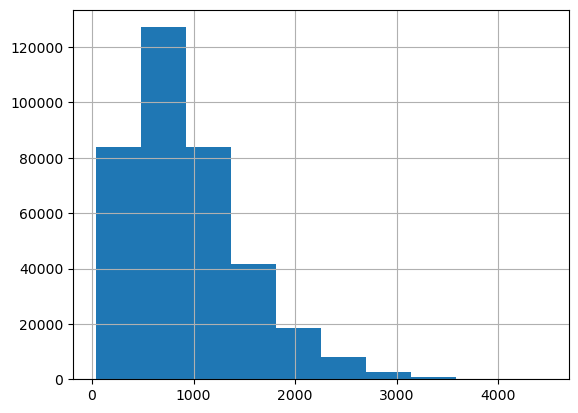

In [7]:
pubs_with_available_search_reports_df.days_to_grant.hist()

<Axes: >

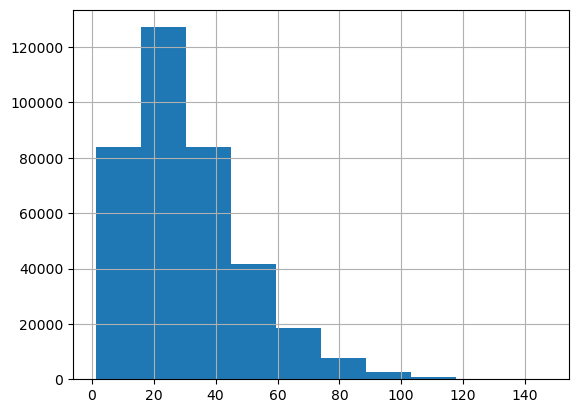

In [8]:
pubs_with_available_search_reports_df.months_to_grant.hist()

<Axes: >

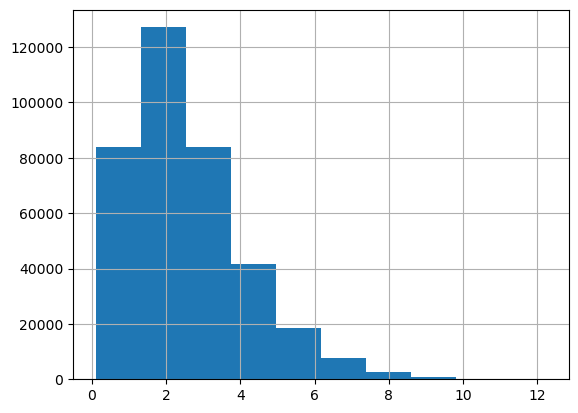

In [9]:
pubs_with_available_search_reports_df.years_to_grant.hist()

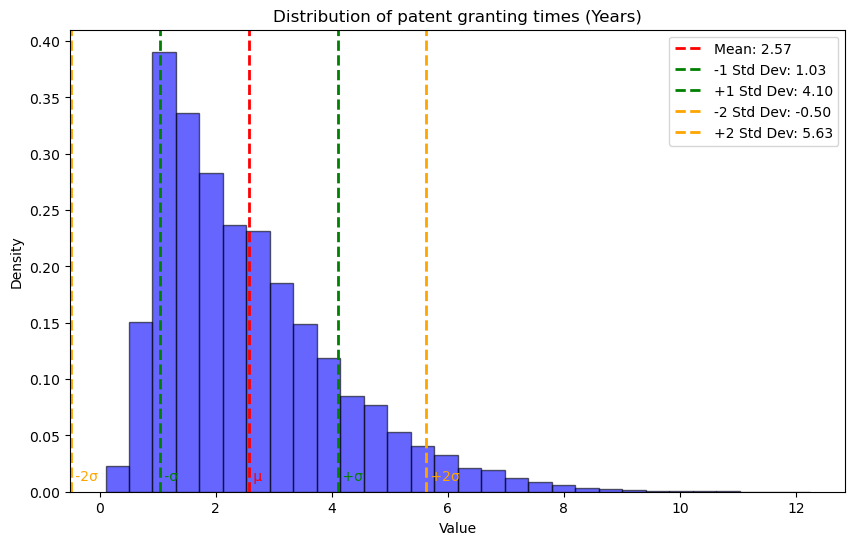

In [12]:
import matplotlib.pyplot as plt
import numpy as np
data = pubs_with_available_search_reports_df.years_to_grant

# Calculate statistics
mean = np.mean(data)
std_dev = np.std(data)

# Define standard deviation intervals
one_std_range = (mean - std_dev, mean + std_dev)
two_std_range = (mean - 2 * std_dev, mean + 2 * std_dev)

# Count values within each range
within_one_std = np.sum((data >= one_std_range[0]) & (data <= one_std_range[1]))
within_two_std = np.sum((data >= two_std_range[0]) & (data <= two_std_range[1]))

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, alpha=0.6, color='blue', edgecolor='black', density=True)

# Marking mean and standard deviations
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(one_std_range[0], color='green', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {one_std_range[0]:.2f}')
plt.axvline(one_std_range[1], color='green', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {one_std_range[1]:.2f}')
plt.axvline(two_std_range[0], color='orange', linestyle='dashed', linewidth=2, label=f'-2 Std Dev: {two_std_range[0]:.2f}')
plt.axvline(two_std_range[1], color='orange', linestyle='dashed', linewidth=2, label=f'+2 Std Dev: {two_std_range[1]:.2f}')

# Annotations
plt.text(mean, 0.02, " μ", verticalalignment='top', color='red')
plt.text(one_std_range[0], 0.02, " -σ", verticalalignment='top', color='green')
plt.text(one_std_range[1], 0.02, " +σ", verticalalignment='top', color='green')
plt.text(two_std_range[0], 0.02, " -2σ", verticalalignment='top', color='orange')
plt.text(two_std_range[1], 0.02, " +2σ", verticalalignment='top', color='orange')


plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of patent granting times (Years)')
plt.legend()

In [13]:
# Total number of data points
total = len(data)

# Percentage within 1 and 2 standard deviations
percent_within_one_std = within_one_std / total * 100
percent_within_two_std = within_two_std / total * 100

# Print results
print(f"Percentage within ±1σ: {percent_within_one_std:.2f}%")
print(f"Percentage within ±2σ: {percent_within_two_std:.2f}%")


Percentage within ±1σ: 74.15%
Percentage within ±2σ: 95.03%


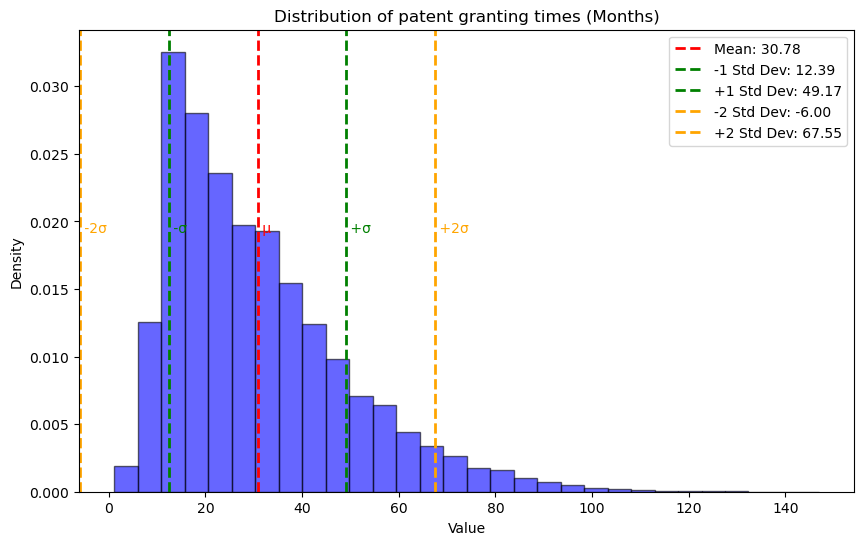

In [87]:
import numpy as np
data = pubs_with_available_search_reports_df.months_to_grant

# Calculate statistics
mean = np.mean(data)
std_dev = np.std(data)

# Define standard deviation intervals
one_std_range = (mean - std_dev, mean + std_dev)
two_std_range = (mean - 2 * std_dev, mean + 2 * std_dev)

# Count values within each range
within_one_std = np.sum((data >= one_std_range[0]) & (data <= one_std_range[1]))
within_two_std = np.sum((data >= two_std_range[0]) & (data <= two_std_range[1]))

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, alpha=0.6, color='blue', edgecolor='black', density=True)

# Marking mean and standard deviations
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(one_std_range[0], color='green', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {one_std_range[0]:.2f}')
plt.axvline(one_std_range[1], color='green', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {one_std_range[1]:.2f}')
plt.axvline(two_std_range[0], color='orange', linestyle='dashed', linewidth=2, label=f'-2 Std Dev: {two_std_range[0]:.2f}')
plt.axvline(two_std_range[1], color='orange', linestyle='dashed', linewidth=2, label=f'+2 Std Dev: {two_std_range[1]:.2f}')

# Annotations
plt.text(mean, 0.02, " μ", verticalalignment='top', color='red')
plt.text(one_std_range[0], 0.02, " -σ", verticalalignment='top', color='green')
plt.text(one_std_range[1], 0.02, " +σ", verticalalignment='top', color='green')
plt.text(two_std_range[0], 0.02, " -2σ", verticalalignment='top', color='orange')
plt.text(two_std_range[1], 0.02, " +2σ", verticalalignment='top', color='orange')


plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of patent granting times (Months)')
plt.legend()

# INventor analisys

In [2]:
import pandas as pd
df = pd.read_csv('./joined_df_for_deriving_combined_caracteristics.csv',sep='\t')

/tmp/ipykernel_51892/2337058282.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./joined_df_for_deriving_combined_caracteristics.csv',sep='\t')


In [7]:
list_of_inventor_lists =list( df['inventor_names'])

In [9]:
import ast
list_of_inventor_lists = [ast.literal_eval(s) for s in list_of_inventor_lists]

In [12]:
from collections import defaultdict

name_count = defaultdict(int)

# For each sublist, count unique names in that sublist
for sublist in list_of_inventor_lists:
    unique_names = set(sublist)
    for name in unique_names:
        name_count[name] += 1

# Convert to regular dict if you want
name_count = dict(name_count)

In [14]:
import statistics


counts = list(name_count.values())

# Calculate statistics
min_count = min(counts)
max_count = max(counts)
mean_count = statistics.mean(counts)
median_count = statistics.median(counts)

print(f"Min: {min_count}")
print(f"Max: {max_count}")
print(f"Mean: {mean_count}")
print(f"Median: {median_count}")

Min: 1
Max: 3964
Mean: 2.0951758012441926
Median: 1.0


# Applicant analisys

In [15]:
list_of_inventor_lists =list( df['applicant_names'])

import ast
list_of_inventor_lists = [ast.literal_eval(s) for s in list_of_inventor_lists]

from collections import defaultdict

name_count = defaultdict(int)

# For each sublist, count unique names in that sublist
for sublist in list_of_inventor_lists:
    unique_names = set(sublist)
    for name in unique_names:
        name_count[name] += 1

# Convert to regular dict if you want
name_count = dict(name_count)

In [16]:
import statistics


counts = list(name_count.values())

# Calculate statistics
min_count = min(counts)
max_count = max(counts)
mean_count = statistics.mean(counts)
median_count = statistics.median(counts)

print(f"Min: {min_count}")
print(f"Max: {max_count}")
print(f"Mean: {mean_count}")
print(f"Median: {median_count}")

Min: 1
Max: 12469
Mean: 6.522018986625265
Median: 1.0


# Attorney statistics

In [19]:
list_of_inventor_lists =list( df['representative_name'])



from collections import defaultdict

name_count = defaultdict(int)


for name in list_of_inventor_lists:
    name_count[name] += 1

# Convert to regular dict if you want
name_count = dict(name_count)

In [20]:
import statistics


counts = list(name_count.values())

# Calculate statistics
min_count = min(counts)
max_count = max(counts)
mean_count = statistics.mean(counts)
median_count = statistics.median(counts)

print(f"Min: {min_count}")
print(f"Max: {max_count}")
print(f"Mean: {mean_count}")
print(f"Median: {median_count}")

Min: 1
Max: 46434
Mean: 78.69427476964489
Median: 12
